<a href="https://colab.research.google.com/github/Ruthuvikas/Transformer/blob/main/LORA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

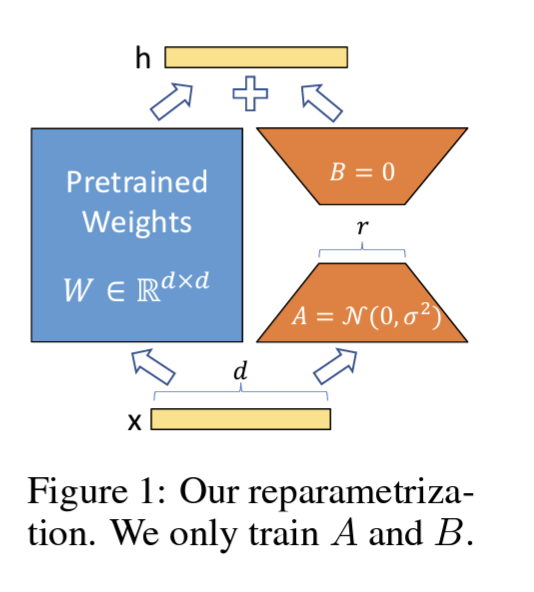

In [1]:
import torch

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define dimensions
d = 128  # Input dimension
k = 64   # Output dimension
r = 4    # Rank of low-rank matrices
batch_size = 16  # Batch size for input

# Input and target output (moved to GPU)
X = torch.rand((batch_size, d), device=device)  # Input features
y = torch.rand((batch_size, k), device=device)  # Target output for new task

# Original pre-trained weight matrix (moved to GPU, frozen)
W0 = torch.rand((d, k), device=device, requires_grad=False)  # W0 is frozen

# Initialize low-rank matrices (moved to GPU)
A = torch.rand((d, r), device=device, requires_grad=True)  # Low-rank component (row space)
B = torch.rand((r, k), device=device, requires_grad=True)  # Low-rank component (column space)

# Optimizer
optimizer = torch.optim.Adam([A, B], lr=1e-3)

# Training loop
for step in range(10000):
    optimizer.zero_grad()

    # Compute the low-rank update (Delta W)
    delta_W = A @ B

    # Compute the output using the updated weight matrix (W0 + Delta W)
    h = X @ (W0 + delta_W)

    # Compute the loss (task-specific, comparing h to target y)
    loss = torch.mean((h - y)**2)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss periodically
    if step % 1000 == 0:
        print(f"Step {step}, Loss: {loss.item():.6f}")

# Final evaluation of the model's performance
with torch.no_grad():
    h_final = X @ (W0 + (A @ B))
    final_loss = torch.mean((h_final - y)**2)
    print(f"\nFinal Loss on Training Data: {final_loss:.6f}")


Using device: cuda
Step 0, Loss: 9155.208984
Step 1000, Loss: 956.691406
Step 2000, Loss: 14.680754
Step 3000, Loss: 1.406252
Step 4000, Loss: 1.268969
Step 5000, Loss: 1.133562
Step 6000, Loss: 1.023354
Step 7000, Loss: 0.948025
Step 8000, Loss: 0.897839
Step 9000, Loss: 0.862566

Final Loss on Training Data: 0.837074
